In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from tqdm import tqdm
import plotly.graph_objects as go

# data

In [3]:
def get_prices(round: int, day: int):

    path = f"../../data/round{round}/prices_round_{round}_day_{day}.csv"
    return pd.read_csv(path, sep=";")


def get_trades(round: int, day: int):

    path = f"../../data/round{round}/trades_round_{round}_day_{day}.csv"
    return pd.read_csv(path, sep=";")

price_frames = []
trade_frames = []

for day in range(1, 2):  

    prices = get_prices(3, day)
    trades = get_trades(3, day)
    price_frames.append(prices)
    trade_frames.append(trades)

all_prices = pd.concat(price_frames, ignore_index=True)
all_trades = pd.concat(trade_frames, ignore_index=True)




In [4]:
all_prices

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,VOLCANIC_ROCK,10515.0,143.0,10514.0,57.0,NaN,NaN,10517,200,NaN,NaN,NaN,NaN,10516.0,0.0
1,1,0,PICNIC_BASKET1,58705.0,12.0,58704.0,27.0,NaN,NaN,58716,12,58717.0,27.0,NaN,NaN,58710.5,0.0
2,1,0,PICNIC_BASKET2,30252.0,12.0,30251.0,27.0,NaN,NaN,30258,39,NaN,NaN,NaN,NaN,30255.0,0.0
3,1,0,VOLCANIC_ROCK_VOUCHER_9500,1015.0,12.0,NaN,NaN,NaN,NaN,1017,12,NaN,NaN,NaN,NaN,1016.0,0.0
4,1,0,VOLCANIC_ROCK_VOUCHER_9750,766.0,12.0,NaN,NaN,NaN,NaN,767,12,NaN,NaN,NaN,NaN,766.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139995,1,999900,VOLCANIC_ROCK_VOUCHER_9500,720.0,15.0,NaN,NaN,NaN,NaN,722,15,NaN,NaN,NaN,NaN,721.0,0.0
139996,1,999900,VOLCANIC_ROCK_VOUCHER_10500,8.0,15.0,NaN,NaN,NaN,NaN,9,15,NaN,NaN,NaN,NaN,8.5,0.0
139997,1,999900,VOLCANIC_ROCK_VOUCHER_9750,472.0,15.0,NaN,NaN,NaN,NaN,473,15,NaN,NaN,NaN,NaN,472.5,0.0
139998,1,999900,PICNIC_BASKET1,58713.0,15.0,58712.0,21.0,NaN,NaN,58724,15,58725.0,21.0,NaN,NaN,58718.5,0.0


In [8]:
voucher10000 = all_prices[all_prices["product"] == "VOLCANIC_ROCK_VOUCHER_10000"]
volcanic_rock = all_prices[all_prices["product"] == "VOLCANIC_ROCK"]

In [171]:
voucher10000 = voucher10000.merge(
    volcanic_rock[['timestamp', 'mid_price']],
    on='timestamp',
    how='left'
)
voucher10000

voucher10000.rename(columns={'mid_price_y': 'underlying'}, inplace=True)


In [173]:
voucher9750 = all_prices[all_prices["product"] == "VOLCANIC_ROCK_VOUCHER_9750"]
volcanic_rock = all_prices[all_prices["product"] == "VOLCANIC_ROCK"]

voucher9750 = voucher9750.merge(
    volcanic_rock[['timestamp', 'mid_price']],
    on='timestamp',
    how='left'
)
voucher9750

voucher9750.rename(columns={'mid_price_y': 'underlying'}, inplace=True)


In [299]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import brentq



class BlackScholes:
    @staticmethod
    def black_scholes_call(spot, strike, time_to_expiry, volatility):
        d1 = (
            log(spot) - log(strike) + (0.5 * volatility * volatility) * time_to_expiry
        ) / (volatility * sqrt(time_to_expiry))
        d2 = d1 - volatility * sqrt(time_to_expiry)
        call_price = spot * NormalDist().cdf(d1) - strike * NormalDist().cdf(d2)
        return call_price




def black_scholes_call(spot, strike, time_to_expiry, volatility):
    d1 = (np.log(spot / strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    d2 = d1 - volatility * np.sqrt(time_to_expiry)
    call_price = (spot * norm.cdf(d1) - strike * norm.cdf(d2))
    return call_price


def delta(spot, strike, time_to_expiry, volatility):
    d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    return norm.cdf(d1)

def gamma(spot, strike, time_to_expiry, volatility):
    d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    return norm.pdf(d1)/(spot * volatility * np.sqrt(time_to_expiry))

def vega(spot, strike, time_to_expiry, volatility):
    d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    return norm.pdf(d1) * (spot * np.sqrt(time_to_expiry)) / 100


def implied_volatility(C, S, K, T, tol=0.0001,
                            max_iterations=100):

    sigma = 0.3

    for i in range(max_iterations):
        
        diff = black_scholes_call(S, K, T, sigma) - C

        ###break if difference is less than specified tolerance level
        if abs(diff) < tol:
            print(f'found on {i}th iteration')
            print(f'difference is equal to {diff}')
            break

        sigma = sigma - diff / vega(S, K, T, sigma)

    return sigma


In [302]:
voucher9750

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price_x,profit_and_loss,underlying,implied_vol
0,1,0,VOLCANIC_ROCK_VOUCHER_9750,766.0,12.0,NaN,NaN,NaN,NaN,767,12,NaN,NaN,NaN,NaN,766.5,0.0,10516.0,0.234647
1,1,100,VOLCANIC_ROCK_VOUCHER_9750,765.0,13.0,NaN,NaN,NaN,NaN,766,13,NaN,NaN,NaN,NaN,765.5,0.0,10515.0,0.234386
2,1,200,VOLCANIC_ROCK_VOUCHER_9750,765.0,16.0,NaN,NaN,NaN,NaN,766,16,NaN,NaN,NaN,NaN,765.5,0.0,10515.0,0.234386
3,1,300,VOLCANIC_ROCK_VOUCHER_9750,767.0,14.0,NaN,NaN,NaN,NaN,768,14,NaN,NaN,NaN,NaN,767.5,0.0,10517.0,0.234908
4,1,400,VOLCANIC_ROCK_VOUCHER_9750,770.0,18.0,NaN,NaN,NaN,NaN,771,18,NaN,NaN,NaN,NaN,770.5,0.0,10519.5,0.255495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,999500,VOLCANIC_ROCK_VOUCHER_9750,476.0,18.0,NaN,NaN,NaN,NaN,477,18,NaN,NaN,NaN,NaN,476.5,0.0,10224.5,0.188379
9996,1,999600,VOLCANIC_ROCK_VOUCHER_9750,477.0,19.0,NaN,NaN,NaN,NaN,478,19,NaN,NaN,NaN,NaN,477.5,0.0,10225.5,0.188704
9997,1,999700,VOLCANIC_ROCK_VOUCHER_9750,472.0,16.0,NaN,NaN,NaN,NaN,473,16,NaN,NaN,NaN,NaN,472.5,0.0,10222.0,0.155077
9998,1,999800,VOLCANIC_ROCK_VOUCHER_9750,474.0,16.0,NaN,NaN,NaN,NaN,475,16,NaN,NaN,NaN,NaN,474.5,0.0,10223.5,0.169912


In [322]:
strike_price = 9750      # Strike price of the option
time_to_expiry = 4/252      # Time to expiry in years

voucher9750['implied_vol'] = voucher9750.apply(lambda row: implied_volatility(row['mid_price_x'], row['underlying'], strike_price, time_to_expiry), axis=1)


/var/folders/cb/9kkmszhd7fx9_93t2qb1_s640000gn/T/ipykernel_4886/3881209897.py:23: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(spot / strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
/var/folders/cb/9kkmszhd7fx9_93t2qb1_s640000gn/T/ipykernel_4886/3881209897.py:38: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
/var/folders/cb/9kkmszhd7fx9_93t2qb1_s640000gn/T/ipykernel_4886/3881209897.py:58: RuntimeWarning: divide by zero encountered in scalar divide
  sigma = sigma - diff / vega(S, K, T, sigma)
/var/folders/cb/9kkmszhd7fx9_93t2qb1_s640000gn/T/ipykernel_4886/3881209897.py:23: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(spot / strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
/var/folders/cb/9kkmszhd7fx9_93t2qb1_s640000gn/T

In [324]:
voucher9750["implied_vol"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9995   NaN
9996   NaN
9997   NaN
9998   NaN
9999   NaN
Name: implied_vol, Length: 10000, dtype: float64

<Axes: >

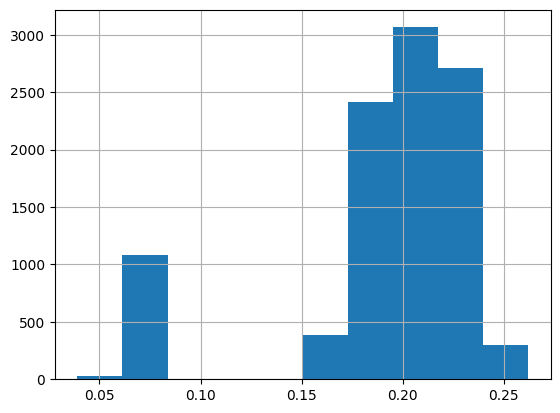

In [312]:
voucher9750_clean['implied_vol'].hist()

#voucher9750_clean['mid_price_x'].hist()

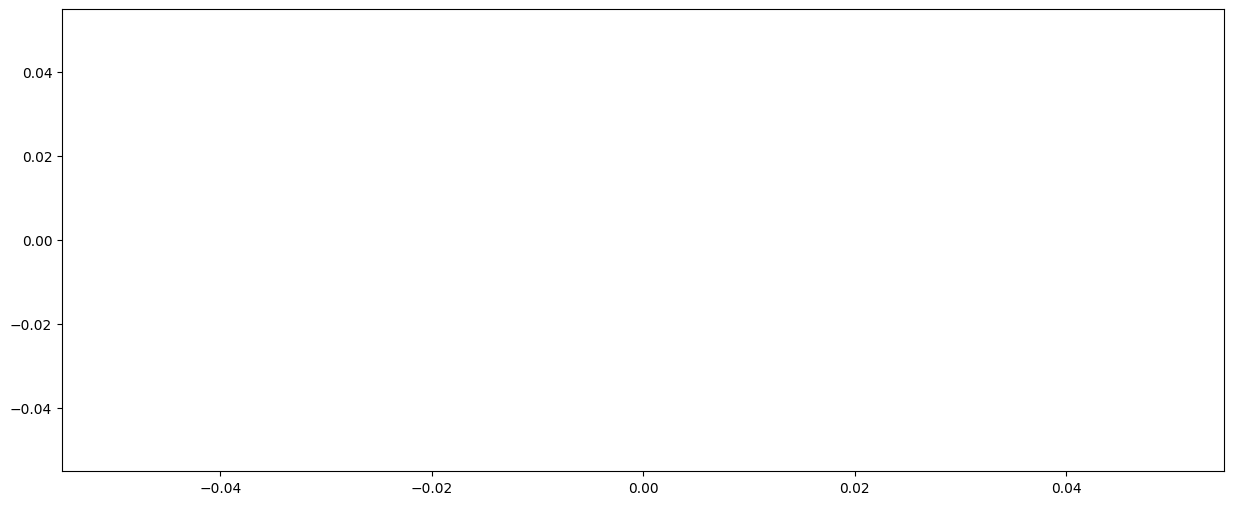

In [314]:
#Squid Ink
plt.figure(figsize=(15, 6)) 
plt.plot(voucher9750['timestamp'], voucher9750['implied_vol'], label='Mid Price', color='blue')

In [273]:
voucher9750['implied_vol'].value_counts()


implied_vol
0.058750    1106
0.214095      60
0.217280      55
0.213829      51
0.215158      50
            ... 
0.188413       1
0.190316       1
0.187869       1
0.188141       1
0.155077       1
Name: count, Length: 1463, dtype: int64

In [ ]:
buy options below 0.1 and sell 

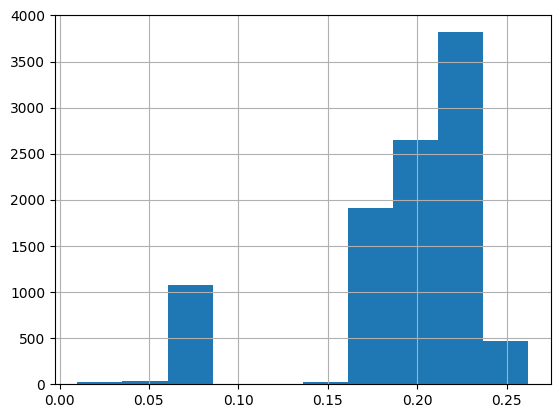

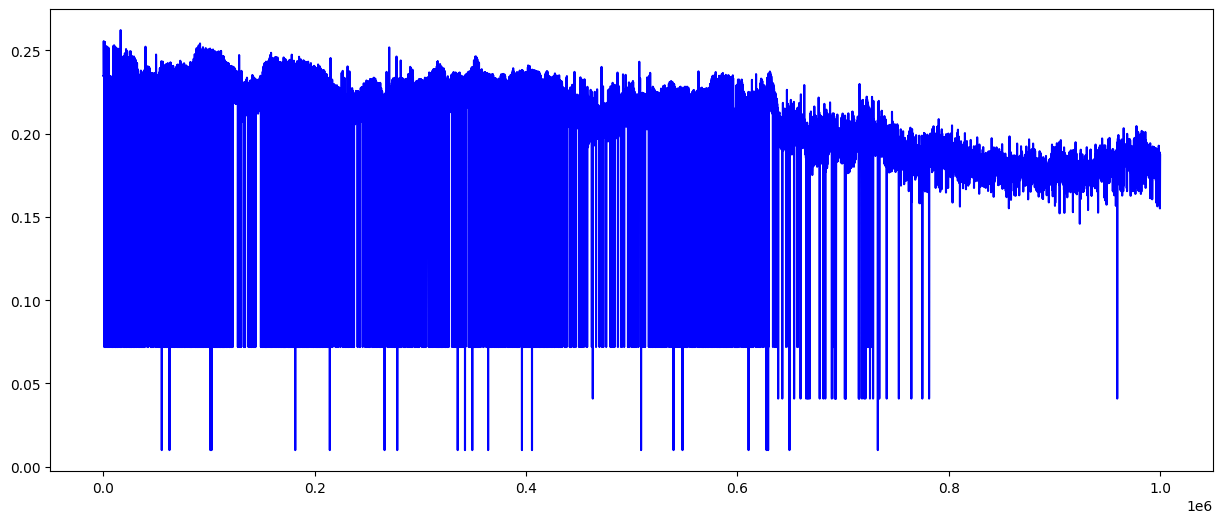

In [191]:
voucher9750_clean['implied_vol'].hist()


plt.figure(figsize=(15, 6)) 
plt.plot(voucher9750['timestamp'], voucher9750['implied_vol'], label='Mid Price', color='blue')


In [152]:

strike_price = 9750      # Strike price of the option
time_to_expiry = 4/252      # Time to expiry in years

voucher10000['implied_vol'] = voucher10000.apply(lambda row: implied_volatility(row['mid_price_x'], row['underlying'], strike_price, time_to_expiry), axis=1)


KeyboardInterrupt: 

In [62]:
voucher10000['implied_vol'].mean()

KeyError: 'implied_vol'

In [ ]:
# Get the unique products
unique_products = df['product'].unique()

for product in unique_products:
    # Filter the dataframe for the current product
    product_df = df[df['product'] == product]
    
    # Create a figure with 2 rows and 3 columns
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    
    # Plot bid volume histograms
    sns.histplot(data=product_df, x='bid_volume_1', ax=axes[0, 0])
    sns.histplot(data=product_df, x='bid_volume_2', ax=axes[0, 1])
    sns.histplot(data=product_df, x='bid_volume_3', ax=axes[0, 2])
    
    # Plot ask volume histograms
    sns.histplot(data=product_df, x='ask_volume_1', ax=axes[1, 0])
    sns.histplot(data=product_df, x='ask_volume_2', ax=axes[1, 1])
    sns.histplot(data=product_df, x='ask_volume_3', ax=axes[1, 2])
    
    # Set titles for subplots
    axes[0, 0].set_title(f"{product} - Bid Volume 1")
    axes[0, 1].set_title(f"{product} - Bid Volume 2")
    axes[0, 2].set_title(f"{product} - Bid Volume 3")
    axes[1, 0].set_title(f"{product} - Ask Volume 1")
    axes[1, 1].set_title(f"{product} - Ask Volume 2")
    axes[1, 2].set_title(f"{product} - Ask Volume 3")
    
    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [ ]:
weights1 = {
    'CROISSANTS': 6,
    'JAMS': 3,
    'DJEMBES': 1
}
weights2 = {
    'CROISSANTS': 4,
    'JAMS': 2,
}

def compute_synthetic(group):
    def weighted_price(weights):
        bid = sum(
            group[group['product'] == p]['bid_price_1'].iloc[0] * w
            for p, w in weights.items()
            if p in group['product'].values
        )
        ask = sum(
            group[group['product'] == p]['ask_price_1'].iloc[0] * w
            for p, w in weights.items()
            if p in group['product'].values
        )
        return bid, ask

    syn1_bid, syn1_ask = weighted_price(weights1)
    syn2_bid, syn2_ask = weighted_price(weights2)

    return pd.Series({
        'synthetic1_bid': syn1_bid,
        'synthetic1_ask': syn1_ask,
        'synthetic2_bid': syn2_bid,
        'synthetic2_ask': syn2_ask,
    })

synthetic_df = df.groupby('timestamp', as_index=False).apply(compute_synthetic).reset_index(drop=True)

merged_df = pd.merge(df, synthetic_df, on='timestamp')


In [ ]:
# Get the unique product names
products = df['product'].unique()

# Create a new dataframe 'df_fairs' with the desired columns
columns = ['timestamp'] + list(products) + ['SYNTHETIC1', 'SYNTHETIC2']
df_fairs = pd.DataFrame(columns=columns)

# Iterate over unique timestamps in the original dataframe
for timestamp in df['timestamp'].unique():
    # Get the rows for the current timestamp
    rows = df[df['timestamp'] == timestamp]
    
    # Create a dictionary to store the fair values for each product
    fairs = {}
    
    # Iterate over each product and extract its fair value
    for product in products:
        fair = rows.loc[rows['product'] == product, 'fair'].values[0]
        fairs[product] = fair
    
    # Calculate the synthetic fair
    synthetic_fair1 = sum(fairs[product] * weights1.get(product, 0) for product in ['CROISSANTS','JAMS','DJEMBES'])
    synthetic_fair2 = sum(fairs[product] * weights2.get(product, 0) for product in ['CROISSANTS','JAMS'])
    
    new_row = {
        'timestamp': timestamp,
        **{product: fairs[product] for product in products},
        'SYNTHETIC1': synthetic_fair1,
        'SYNTHETIC2': synthetic_fair2
    }
    
    # Append the new row to df_fairs
    df_fairs = pd.concat([df_fairs, pd.DataFrame([new_row])], ignore_index=True)

# Reset the index of df_fairs (optional)
df_fairs = df_fairs.reset_index(drop=True)

In [ ]:
df_pairs = merged_df[merged_df['product'].isin(['PICNIC_BASKET1', 'PICNIC_BASKET2'])]


In [ ]:
df_pairs.loc[:, 'implied_mid1'] = ((df_pairs['synthetic1_bid'] + df_pairs['synthetic1_ask'])/2)
df_pairs.loc[:, 'implied_mid2'] = ((df_pairs['synthetic2_bid'] + df_pairs['synthetic2_ask'])/2)

In [ ]:
basket1_df = df_pairs[df_pairs['product'] == 'PICNIC_BASKET1']
spread_mean = (basket1_df['mid_price'] - basket1_df['implied_mid1']).mean()
print(spread_mean)

In [ ]:
spread_std = (basket1_df['mid_price'] - basket1_df['implied_mid1']).std()
print(spread_std)

In [ ]:
basket2_df = df_pairs[df_pairs['product'] == 'PICNIC_BASKET2']
spread_mean = (basket2_df['mid_price'] - basket2_df['implied_mid2']).mean()
print(spread_mean)

In [ ]:
spread_std = (basket2_df['mid_price'] - basket2_df['implied_mid2']).std()
print(spread_std)

## boellinger band

UFCK fuck fuck fuck fuci kuf ckf uckf cu fk 

In [ ]:
df_fairs = df_fairs[['timestamp', 'CROISSANTS', 'JAMS', 'DJEMBES', 'PICNIC_BASKET1', 'SYNTHETIC1', 'PICNIC_BASKET2', 'SYNTHETIC2']]

In [ ]:
plt.figure(figsize=(15, 6))

plt.plot(df_fairs['timestamp'], df_fairs['PICNIC_BASKET1'], label='PICNIC_BASKET1', color='blue')
plt.plot(df_fairs['timestamp'], df_fairs['SYNTHETIC1'], label='SYNTHETIC1', color='orange')

plt.title('Basket vs Synthetic and Spread')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(15, 6))

plt.plot(df_fairs['timestamp'], df_fairs['PICNIC_BASKET2'], label='PICNIC_BASKET2', color='blue')
plt.plot(df_fairs['timestamp'], df_fairs['SYNTHETIC2'], label='SYNTHETIC2', color='orange')

plt.title('Basket vs Synthetic and Spread')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_fairs['BASKET1_MINUS_SYNTHETIC'] = df_fairs['PICNIC_BASKET1'] - df_fairs["SYNTHETIC1"]
df_fairs['BASKET2_MINUS_SYNTHETIC'] = df_fairs['PICNIC_BASKET2'] - df_fairs["SYNTHETIC2"]

In [ ]:
default_spread_mean = df_fairs['BASKET1_MINUS_SYNTHETIC'].mean()
default_spread_std = df_fairs['BASKET1_MINUS_SYNTHETIC'].std()

print("default_spread_mean_1:", default_spread_mean)
print("default_spread_std_1:", default_spread_std)

In [ ]:
default_spread_mean = df_fairs['BASKET2_MINUS_SYNTHETIC'].mean()
default_spread_std = df_fairs['BASKET2_MINUS_SYNTHETIC'].std()

print("default_spread_mean_2:", default_spread_mean)
print("default_spread_std_2:", default_spread_std)

In [ ]:
def bollinger_bands(data, column, basket_number, window=20, num_std=2):
    """
    Calculate Bollinger Bands for a given DataFrame and column.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame.
    column (str): The name of the column to calculate Bollinger Bands for.
    window (int): The rolling window size for the Simple Moving Average (SMA).
    num_std (int): The number of standard deviations for the upper and lower bands.
    
    Returns:
    pd.DataFrame: The input DataFrame with additional columns for the Bollinger Bands.
    """
    # Calculate the Simple Moving Average (SMA)
    data[f'SMA_{basket_number}'] = data[column].rolling(window=window).mean()
    
    # Calculate the standard deviation
    data[f'STD_{basket_number}'] = data[column].rolling(window=window).std()
    
    # Calculate the upper and lower Bollinger Bands
    data[f'UPPER_BAND_{basket_number}'] = data[f'SMA_{basket_number}'] + (data[f'STD_{basket_number}'] * num_std)
    data[f'LOWER_BAND_{basket_number}'] = data[f'SMA_{basket_number}'] - (data[f'STD_{basket_number}'] * num_std)
    
    return data

# Example usage
df_fairs = bollinger_bands(df_fairs, column='BASKET1_MINUS_SYNTHETIC', window=200, num_std=1.5, basket_number=1)
df_fairs = bollinger_bands(df_fairs, column='BASKET2_MINUS_SYNTHETIC', window=200, num_std=1.5, basket_number=2)

# Calculate the change in STD
df_fairs['STD_CHANGE_1'] = df_fairs['STD_1'].diff()
df_fairs['STD_CHANGE_2'] = df_fairs['STD_2'].diff()

In [ ]:
df_fairs

In [ ]:
# Create the plot
fig = go.Figure()

# Add the BASKET_MINUS_SYNTHETIC line
fig.add_trace(go.Scatter(x=df_fairs['timestamp'], y=df_fairs['BASKET1_MINUS_SYNTHETIC'].ewm(halflife=5).mean(),
                         mode='lines', name='BASKET1_MINUS_SYNTHETIC'))

# Add the Upper Bollinger Band line
fig.add_trace(go.Scatter(x=df_fairs['timestamp'], y=df_fairs['UPPER_BAND_1'],
                         mode='lines', name='Upper Band', line=dict(color='red')))

# Add the Simple Moving Average (SMA) line
fig.add_trace(go.Scatter(x=df_fairs['timestamp'], y=df_fairs['SMA_1'],
                         mode='lines', name='SMA', line=dict(color='blue')))

# Add the Lower Bollinger Band line
fig.add_trace(go.Scatter(x=df_fairs['timestamp'], y=df_fairs['LOWER_BAND_1'],
                         mode='lines', name='Lower Band', line=dict(color='green')))

# Add the change in STD line on a separate y-axis
fig.add_trace(go.Scatter(x=df_fairs['timestamp'], y=df_fairs['STD_1'],
                         mode='lines', name='STD', line=dict(color='purple'),
                         yaxis='y2'))

# Update the layout to include the secondary y-axis
fig.update_layout(
    title='Bollinger Bands with STD',
    xaxis_title='Timestamp',
    yaxis=dict(title='BASKET1_MINUS_SYNTHETIC'),
    yaxis2=dict(title='STD', overlaying='y', side='right')
)

# Display the plot
fig.show()

In [ ]:
# Create the plot
fig = go.Figure()

# Add the BASKET_MINUS_SYNTHETIC line
fig.add_trace(go.Scatter(x=df_fairs['timestamp'], y=df_fairs['BASKET2_MINUS_SYNTHETIC'].ewm(halflife=5).mean(),
                         mode='lines', name='BASKET2_MINUS_SYNTHETIC'))

# Add the Upper Bollinger Band line
fig.add_trace(go.Scatter(x=df_fairs['timestamp'], y=df_fairs['UPPER_BAND_2'],
                         mode='lines', name='Upper Band', line=dict(color='red')))

# Add the Simple Moving Average (SMA) line
fig.add_trace(go.Scatter(x=df_fairs['timestamp'], y=df_fairs['SMA_2'],
                         mode='lines', name='SMA', line=dict(color='blue')))

# Add the Lower Bollinger Band line
fig.add_trace(go.Scatter(x=df_fairs['timestamp'], y=df_fairs['LOWER_BAND_2'],
                         mode='lines', name='Lower Band', line=dict(color='green')))

# Add the change in STD line on a separate y-axis
fig.add_trace(go.Scatter(x=df_fairs['timestamp'], y=df_fairs['STD_2'],
                         mode='lines', name='STD', line=dict(color='purple'),
                         yaxis='y2'))

# Update the layout to include the secondary y-axis
fig.update_layout(
    title='Bollinger Bands with STD',
    xaxis_title='Timestamp',
    yaxis=dict(title='BASKET2_MINUS_SYNTHETIC'),
    yaxis2=dict(title='STD', overlaying='y', side='right')
)

# Display the plot
fig.show()

In [ ]:
def identify_regime_1(data, mean=370, lookback=20, ewma=0):
    """
    Identify the regime based on the price's interaction with Bollinger Bands.

    Parameters:
    data (pd.DataFrame): The input DataFrame containing Bollinger Bands.
    lookback (int): The lookback period to determine the regime.

    Returns:
    pd.Series: A series containing the identified regime for each row.
    """
    price = data['BASKET1_MINUS_SYNTHETIC']
    if ewma != 0: 
        price = data['BASKET1_MINUS_SYNTHETIC'].ewm(halflife=ewma).mean()
    upper = data['UPPER_BAND_1']
    lower = data['LOWER_BAND_1']

    # Create a rolling window of size lookback
    rolling_window = price.rolling(window=lookback)

    # Check if price is above upper band or below lower band
    above_upper = (price >= upper).rolling(window=lookback).sum()
    below_lower = (price <= lower).rolling(window=lookback).sum()

    # Count contiguous touches of upper and lower bands
    touched_upper = (above_upper > 1).astype(int)
    touched_lower = (below_lower > 1).astype(int)

    # Assign regimes based on the touched bands
    regimes = pd.Series(index=data.index, dtype='object')
    regimes.loc[(touched_upper == 1) & (touched_lower == 1)] = 'OSCILLATING'
    regimes.loc[(touched_upper == 1) & (touched_lower == 0)] = 'RIDING_UPPER'
    regimes.loc[(touched_upper == 0) & (touched_lower == 1)] = 'RIDING_LOWER'
    regimes.fillna('NEUTRAL', inplace=True)

    # Fill the initial lookback period with 'NEUTRAL'
    regimes.iloc[:lookback] = 'NEUTRAL'

    return regimes

# Apply the identify_regime function to your DataFrame
df_fairs['REGIME'] = identify_regime_1(df_fairs, mean=df_fairs['BASKET1_MINUS_SYNTHETIC'].mean(), lookback=400, ewma=5)

In [ ]:
def generate_signals_1(data, mean_price):
    """
    Generate trading signals based on the identified regimes and Bollinger Bands.

    Parameters:
    data (pd.DataFrame): The input DataFrame containing Bollinger Bands and regimes.
    mean_price (float): The mean price to compare against when entering riding regimes.

    Returns:
    pd.Series: A series containing the generated trading signals for each row.
    """
    price = data['BASKET1_MINUS_SYNTHETIC']
    upper = data['UPPER_BAND_1']
    lower = data['LOWER_BAND_1']
    regime = data['REGIME']

    signals = pd.Series(index=data.index, dtype=object)

    for i in tqdm(range(1, len(data))):
        if regime[i] == 'OSCILLATING':
            if price[i] >= upper[i] and price[i-1] < upper[i-1]:
                signals[i] = 'SHORT'
            elif i < len(data) - 1 and price[i] >= upper[i] and price[i+1] < upper[i+1]:
                signals[i] = "SHORT"
            elif price[i] <= lower[i] and price[i-1] > lower[i-1]:
                signals[i] = 'LONG'
            elif i < len(data) - 1 and price[i] <= lower[i] and price[i+1] > lower[i+1]:
                signals[i] = 'LONG'
        elif regime[i] == 'NEUTRAL' and regime[i-1] != 'NEUTRAL':
            signals[i] = 'CLEAR'
        elif regime[i] == 'RIDING_UPPER' and regime[i-1] != 'RIDING_UPPER':
            if price[i] > mean_price:
                signals[i] = 'CLEAR'
            else:
                signals[i] = 'LONG'
        elif regime[i] == 'RIDING_LOWER' and regime[i-1] != 'RIDING_LOWER':
            if price[i] < mean_price:
                signals[i] = 'CLEAR'
            else:
                signals[i] = 'SHORT'

    return signals

df_fairs['SIGNAL'] = generate_signals_1(df_fairs, df_fairs['BASKET1_MINUS_SYNTHETIC'].mean())

In [ ]:
fig = go.Figure()

# Add the BASKET_MINUS_SYNTHETIC line
fig.add_trace(go.Scatter(x=df_fairs['timestamp'], y=df_fairs['BASKET_MINUS_SYNTHETIC'],
                         mode='lines', name='BASKET_MINUS_SYNTHETIC'))

# Add the Upper Bollinger Band line
fig.add_trace(go.Scatter(x=df_fairs['timestamp'], y=df_fairs['UPPER_BAND'],
                         mode='lines', name='Upper Band', line=dict(color='red')))

# Add the Simple Moving Average (SMA) line
fig.add_trace(go.Scatter(x=df_fairs['timestamp'], y=df_fairs['SMA'],
                         mode='lines', name='SMA', line=dict(color='blue')))

# Add the Lower Bollinger Band line
fig.add_trace(go.Scatter(x=df_fairs['timestamp'], y=df_fairs['LOWER_BAND'],
                         mode='lines', name='Lower Band', line=dict(color='green')))

# Find regime switch points
regime_switch_points = df_fairs[df_fairs['REGIME'] != df_fairs['REGIME'].shift(1)]

# Add vertical lines for regime switches
for _, row in regime_switch_points.iterrows():
    fig.add_shape(type='line',
                  x0=row['timestamp'], y0=df_fairs['BASKET_MINUS_SYNTHETIC'].min(),
                  x1=row['timestamp'], y1=df_fairs['BASKET_MINUS_SYNTHETIC'].max(),
                  line=dict(color='black', width=1, dash='dash'))
    
    # Add hover text for regime switches
    fig.add_trace(go.Scatter(x=[row['timestamp']], y=[df_fairs.loc[row.name, 'BASKET_MINUS_SYNTHETIC']],
                             mode='markers', marker=dict(size=0), hoverinfo='text',
                             text=f"Regime: {row['REGIME']}<br>Last Sell Signal: {row['SIGNAL']}"))

# Update the layout
fig.update_layout(title='Bollinger Bands with Regime Switches',
                  xaxis_title='Timestamp',
                  yaxis_title='BASKET_MINUS_SYNTHETIC')

# Display the plot
fig.show()

## backtest

In [ ]:
df_fairs['SIGNAL'].value_counts()

In [ ]:
def update_position(signals):
    """
    Update the position based on the last non-nan signal.
    
    Parameters:
    signals (pd.Series): The series containing the trading signals.
    
    Returns:
    pd.Series: A series containing the updated positions.
    """
    last_signal = None
    positions = []
    
    for signal in signals:
        if pd.notna(signal):
            last_signal = signal
        
        if last_signal == 'LONG':
            position = 60
        elif last_signal == 'SHORT':
            position = -60
        else:
            position = 0
        
        positions.append(position)
    
    return pd.Series(positions, index=signals.index)

# Update the position based on the trading signals
df_fairs['POSITION'] = update_position(df_fairs['SIGNAL'])

In [ ]:
# Initialize the "CASH" column with zeros
df_fairs['CASH'] = 0

# Calculate the position differences
df_fairs['POSITION_DIFF'] = df_fairs['POSITION'].diff().fillna(0)

# Update the "CASH" column based on position changes
df_fairs['CASH'] = -df_fairs['POSITION_DIFF'] * df_fairs['BASKET_MINUS_SYNTHETIC']

# Calculate the cumulative cash
df_fairs['CUMULATIVE_CASH'] = df_fairs['CASH'].cumsum()

df_fairs['PNL'] = df_fairs['CUMULATIVE_CASH'] + df_fairs['POSITION'] * df_fairs["BASKET_MINUS_SYNTHETIC"]

In [ ]:
df_fairs[df_fairs['POSITION_DIFF'] != 0]

In [ ]:
df_fairs['POSITION'].value_counts()

In [ ]:
import plotly.graph_objects as go

# Create the plot
fig = go.Figure()

# Add the CUMULATIVE_CASH line
fig.add_trace(go.Scatter(x=df_fairs['timestamp'], y=df_fairs['PNL'],
                         mode='lines', name='Cum'))

# Update the layout
fig.update_layout(title='Cumulative Cash Over Time',
                  xaxis_title='Timestamp',
                  yaxis_title='Cumulative Cash')

# Display the plot
fig.show()

# gridsearch

In [ ]:
import itertools

def run_backtest(data, bb_window, bb_std, lookback):
    # Calculate Bollinger Bands
    data = bollinger_bands(data, window=bb_window, num_std=bb_std)

    # Identify the regime
    data['REGIME'] = identify_regime(data, mean=data['BASKET_MINUS_SYNTHETIC'].mean(), lookback=lookback)

    # Generate trading signals
    mean_price = data['BASKET_MINUS_SYNTHETIC'].mean()
    data['SIGNAL'] = generate_signals(data, mean_price)

    # Update the position based on the trading signals
    data['POSITION'] = update_position(data['SIGNAL'])

    # Initialize the "CASH" column with zeros
    data['CASH'] = 0

    # Calculate the position differences
    data['POSITION_DIFF'] = data['POSITION'].diff().fillna(0)

    # Update the "CASH" column based on position changes
    data['CASH'] = -data['POSITION_DIFF'] * data['BASKET_MINUS_SYNTHETIC']

    # Calculate the cumulative cash
    data['CUMULATIVE_CASH'] = data['CASH'].cumsum()

    # Calculate the PNL
    data['PNL'] = data['CUMULATIVE_CASH'] + data['POSITION'] * data["BASKET_MINUS_SYNTHETIC"]

    return data

# Define the arrays of candidate values for each parameter
bb_windows = [ 75, 100, 150, 200, 250, 300, 350, 400, 500]
bb_stds = [1.5,1.75, 2,2.25, 2.5]
lookbacks = [50,75,100, 125, 150, 175, 200]

# Perform the grid search
results = []
for bb_window, bb_std, lookback in itertools.product(bb_windows, bb_stds, lookbacks):
    # Run the backtest with the current parameter values
    data = run_backtest(df_fairs.copy(), bb_window, bb_std, lookback)

    # Get the final PNL
    final_pnl = data['PNL'].iloc[-1]

    # Store the results
    results.append({
        'bb_window': bb_window,
        'bb_std': bb_std,
        'lookback': lookback,
        'pnl': final_pnl
    })

    # Print the parameters and PNL for each iteration
    print(f"Bollinger Bands Window: {bb_window}, Bollinger Bands Std: {bb_std}, Lookback: {lookback}, PNL: {final_pnl}")

# Find the best parameters based on the highest PNL
best_result = max(results, key=lambda x: x['pnl'])
print("\nBest Parameters:")
print(f"Bollinger Bands Window: {best_result['bb_window']}")
print(f"Bollinger Bands Std: {best_result['bb_std']}")
print(f"Lookback: {best_result['lookback']}")
print(f"PNL: {best_result['pnl']}")